#Intro

In [1]:
import pandas as pd
x_train = pd.read_csv('X_train.csv')
x_test = pd.read_csv('X_val.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_val.csv')

In [2]:
basic_models = pd.read_csv('Diss_basic_models_results.csv')
basic_models

,Model,MAE,MSE,RMSE
0,Linear Regression,0.041822,0.004631,0.068049
1,Ridge Regression,0.041820,0.004631,0.068049
2,Lasso,0.066641,0.009240,0.096127
3,K-Nearest Regressor,0.030386,0.002292,0.047878
4,Random Forrest,0.019428,0.000827,0.028757
5,Decision Tree,0.025846,0.001606,0.040078
6,Support Vector Machines,0.078275,0.009947,0.099734
7,Gradient Boosting,0.022914,0.001121,0.033485
8,XGBoost,0.020367,0.000869,0.029482
9,EBM,0.023651,0.001227,0.035029


In [3]:
tuned_models = pd.read_csv('Tuned_model_results.csv', index_col=0)
tuned_models

,Model,MAE,MSE,RMSE
0,Linear Regression,0.041829,0.004630,0.068047
1,Ridge Regression,0.041825,0.004630,0.068046
2,Lasso Regression,0.041829,0.004630,0.068047
3,KNeighborsRegressor,0.018235,0.001143,0.033809
4,RandomForestRegressor,0.012024,0.000397,0.019916
5,DecisionTreeRegressor,0.037641,0.003945,0.062808
6,SVR(),NaN,NaN,NaN
7,GradientBoostingRegressor,0.028737,0.001748,0.041805
8,XGBoost,0.011988,0.000385,0.019612
9,ExplainableBoostingRegressor,0.022397,0.001111,0.033337


In [4]:
stacked_model = pd.read_csv('Stacked Model Results.csv', index_col=0)
stacked_model

,Model,MAE,MSE,RMSE
0,Stacked Model,0.011308,0.000365,0.019112


In [5]:
basic_models_min = basic_models[basic_models.MSE == basic_models.MSE.min()]
basic_models_min

,Model,MAE,MSE,RMSE
4,Random Forrest,0.019428,0.000827,0.028757


In [6]:
tuned_models_min = tuned_models[tuned_models.MSE == tuned_models.MSE.min()]
tuned_models_min

,Model,MAE,MSE,RMSE
8,XGBoost,0.011988,0.000385,0.019612


In [7]:
best_models = pd.concat([basic_models_min, tuned_models_min, stacked_model])
best_models

,Model,MAE,MSE,RMSE
4,Random Forrest,0.019428,0.000827,0.028757
8,XGBoost,0.011988,0.000385,0.019612
0,Stacked Model,0.011308,0.000365,0.019112


In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor()


In [ ]:
import xgboost as xg
xgb2 = xg.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=100)

In [ ]:
#Installation
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 11.7 MB/s eta 0:00:00


In [ ]:
#Installation
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
import shap

#Shap1

In [ ]:
x_train_here = x_train.values
y_train_here = y_train.values.ravel()

Permutation explainer: 6086it [31:33,  3.20it/s]


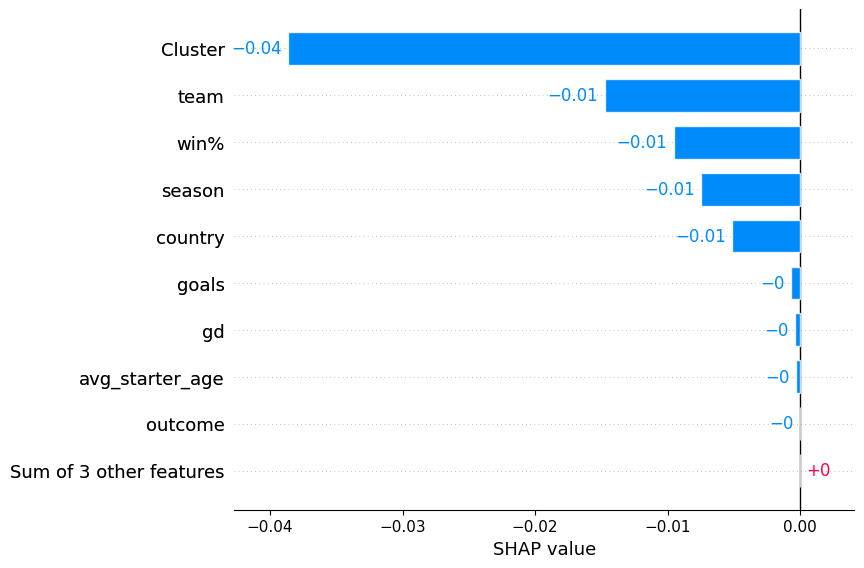

In [ ]:
xgb2.fit(x_train_here, y_train_here)
explainer = shap.Explainer(xgb2.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

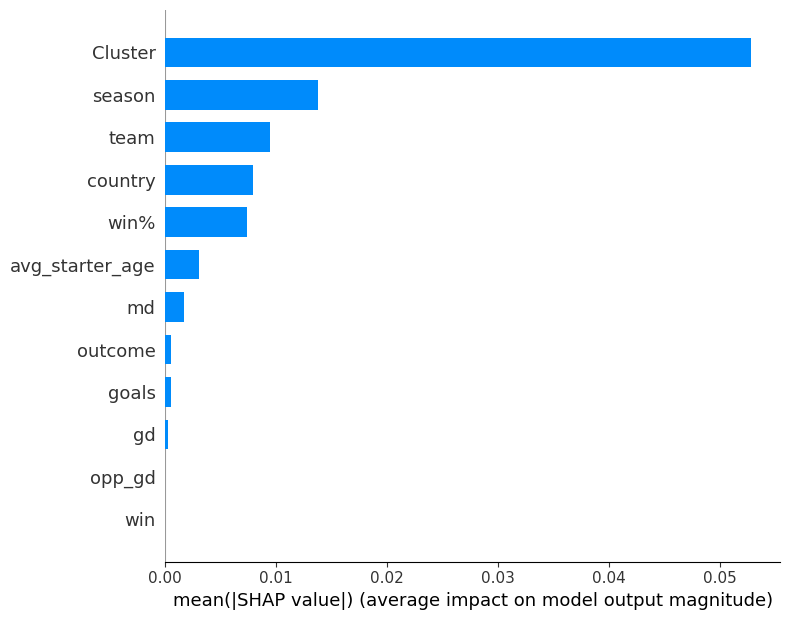

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


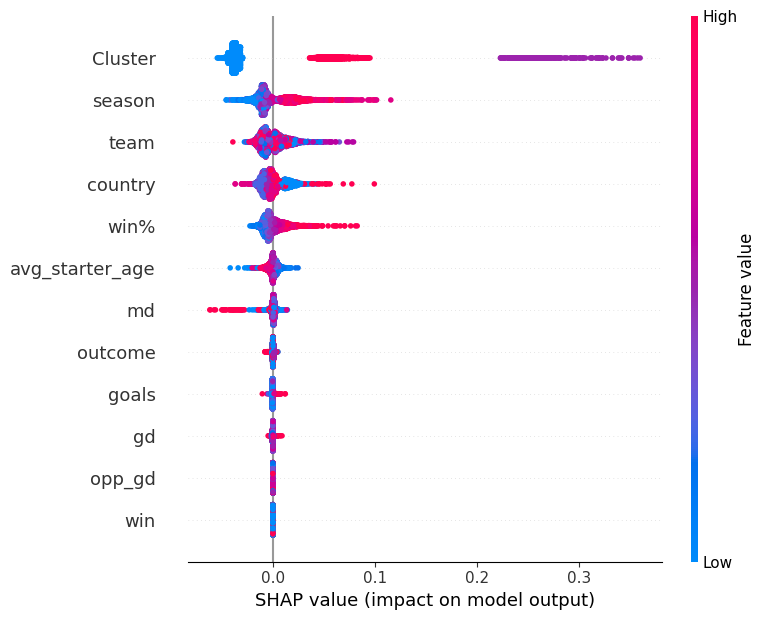

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
xgb2.feature_importances_

array([5.1275990e-03, 4.4278912e-03, 4.4199387e-03, 8.3480659e-04,
       3.9269190e-04, 9.7959238e-01, 0.0000000e+00, 5.0495379e-04,
       5.5589306e-04, 0.0000000e+00, 1.0464843e-03, 3.0973803e-03],
      dtype=float32)

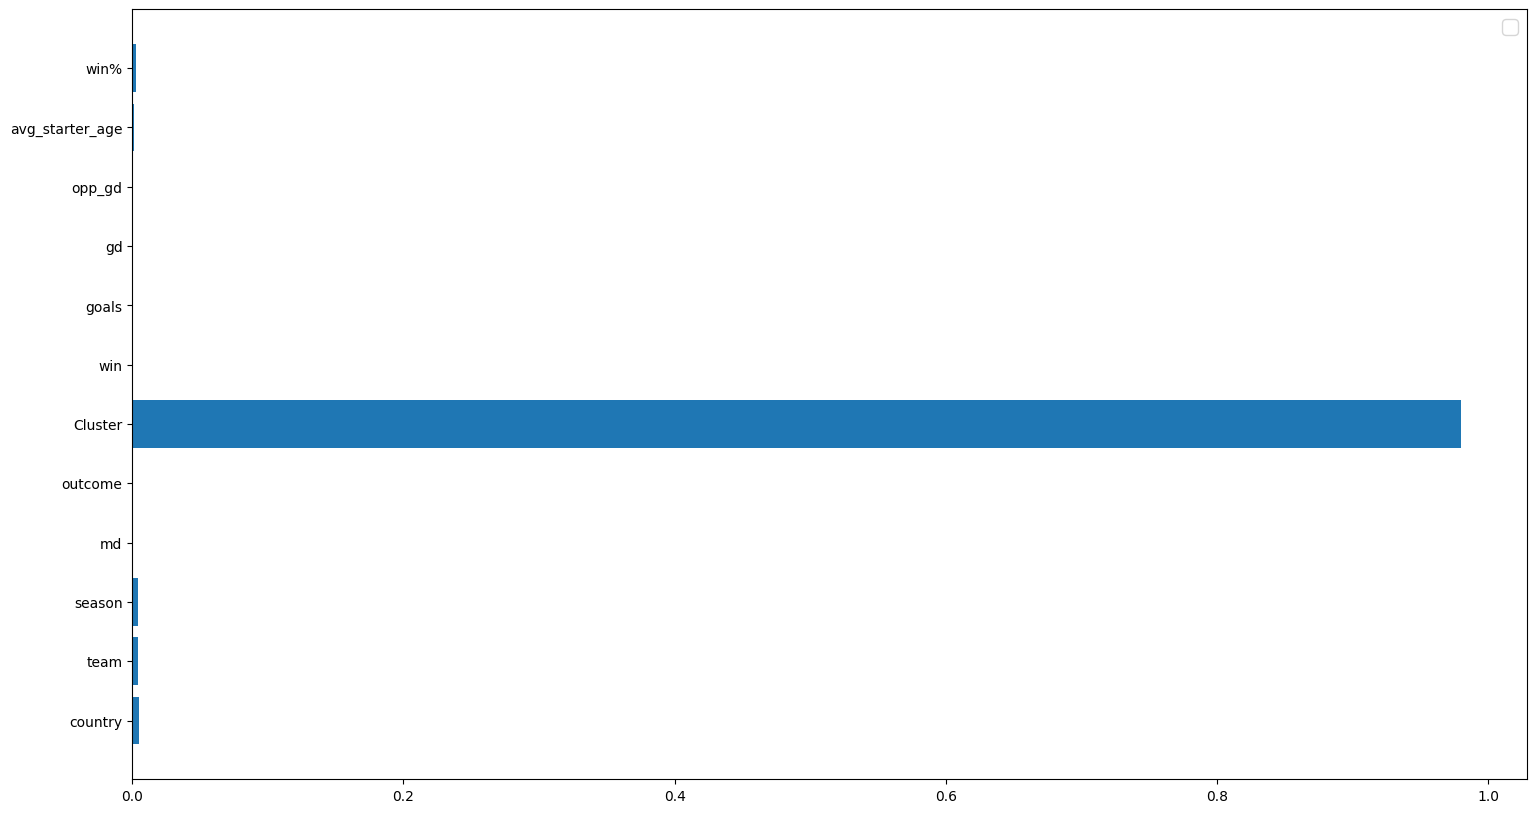

In [ ]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, xgb2.feature_importances_)
ax.legend(fontsize = 14)

#Shap2

In [ ]:
x_train = x_train.drop(['Cluster'], axis=1)

In [ ]:
x_test = x_test.drop(['Cluster'], axis=1)

In [ ]:
x_train_here = x_train.values
y_train_here = y_train.values.ravel()

Permutation explainer: 6086it [33:39,  3.00it/s]


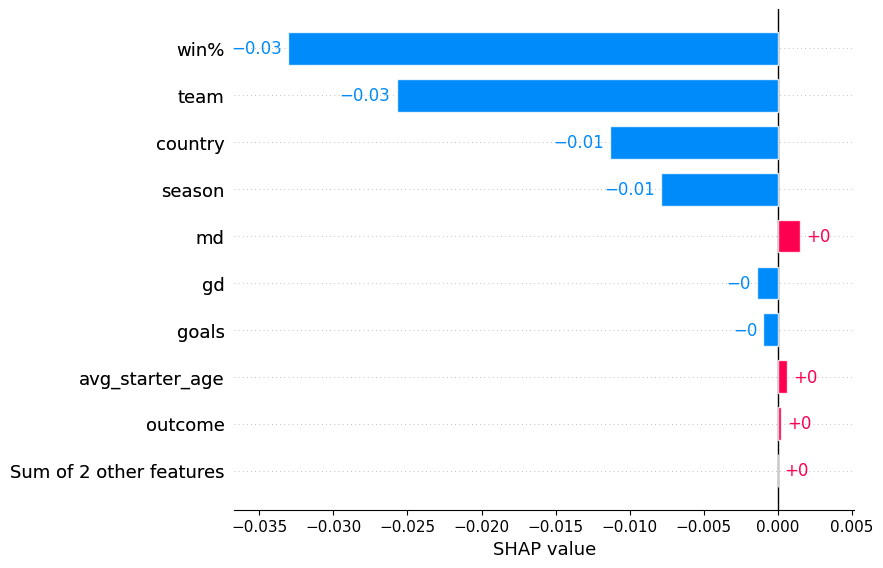

In [ ]:
xgb2.fit(x_train_here, y_train_here)
explainer = shap.Explainer(xgb2.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

In [ ]:
xgb2.feature_importances_

array([0.23161468, 0.10413446, 0.18622601, 0.03533682, 0.00639468,
       0.        , 0.00905139, 0.00980758, 0.        , 0.0183684 ,
       0.39906597], dtype=float32)

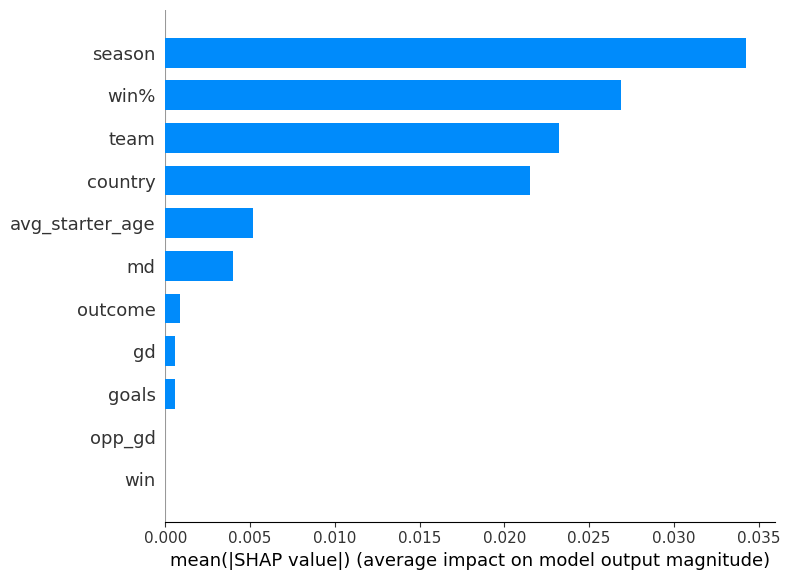

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


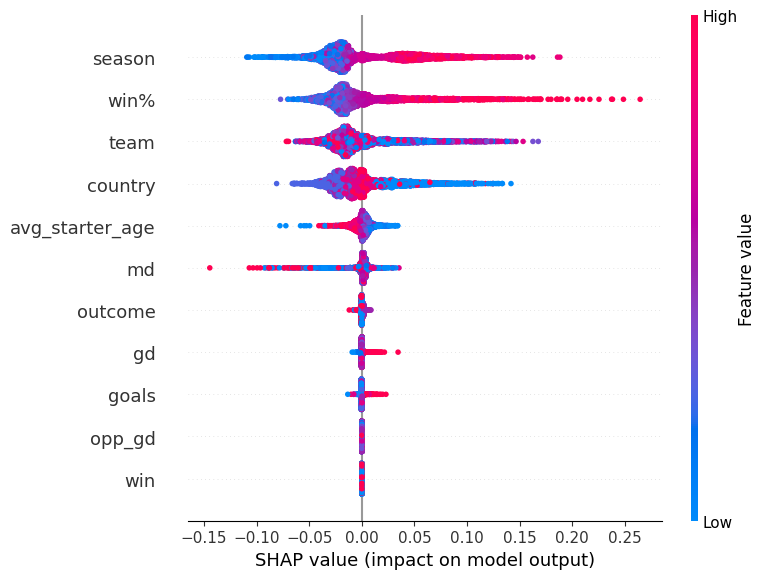

In [ ]:
shap.summary_plot(shap_values, x_test)

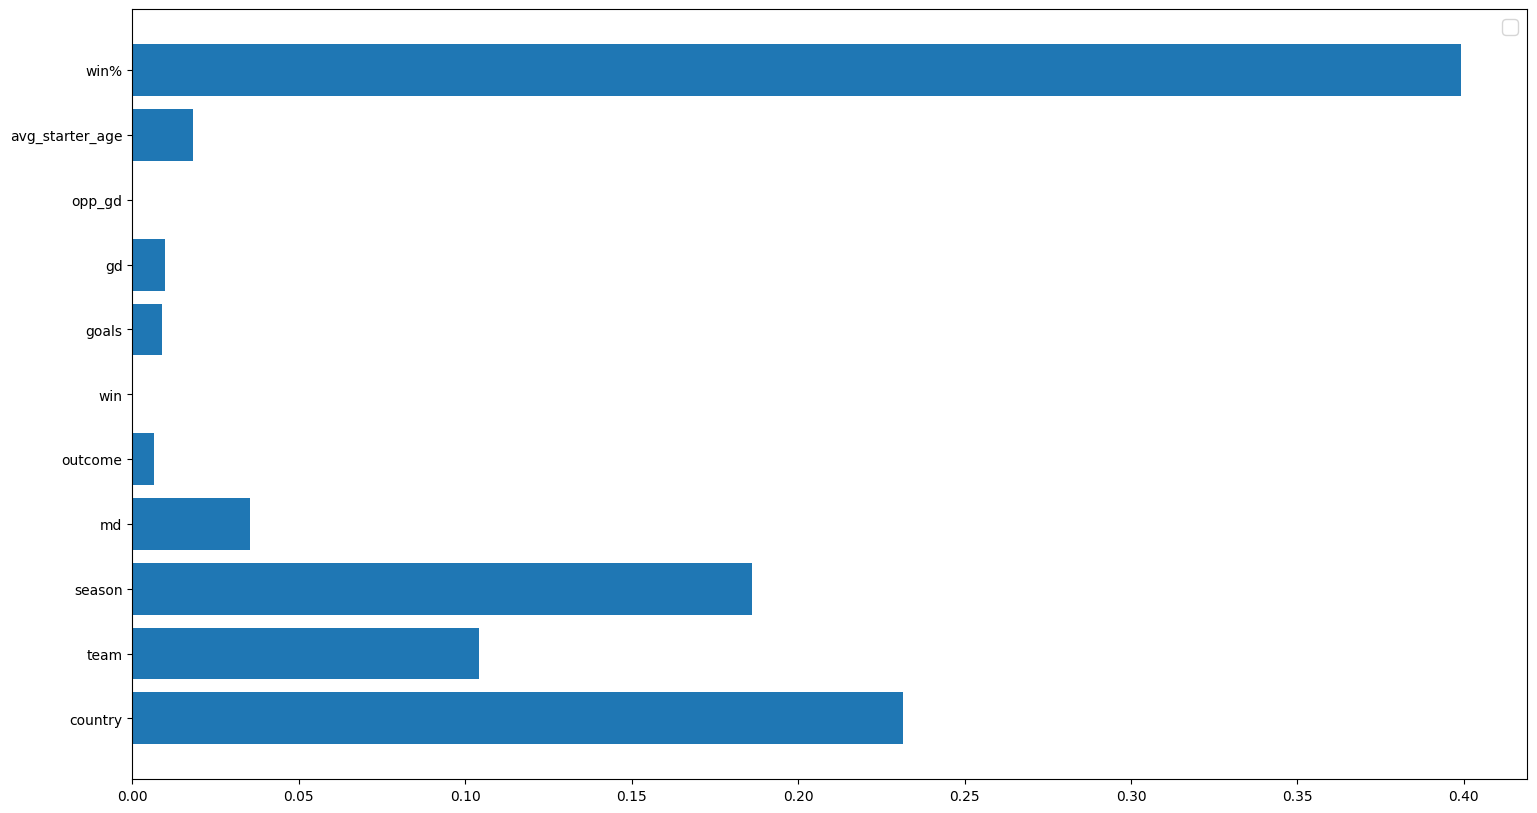

In [ ]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, xgb2.feature_importances_)
ax.legend(fontsize = 14)

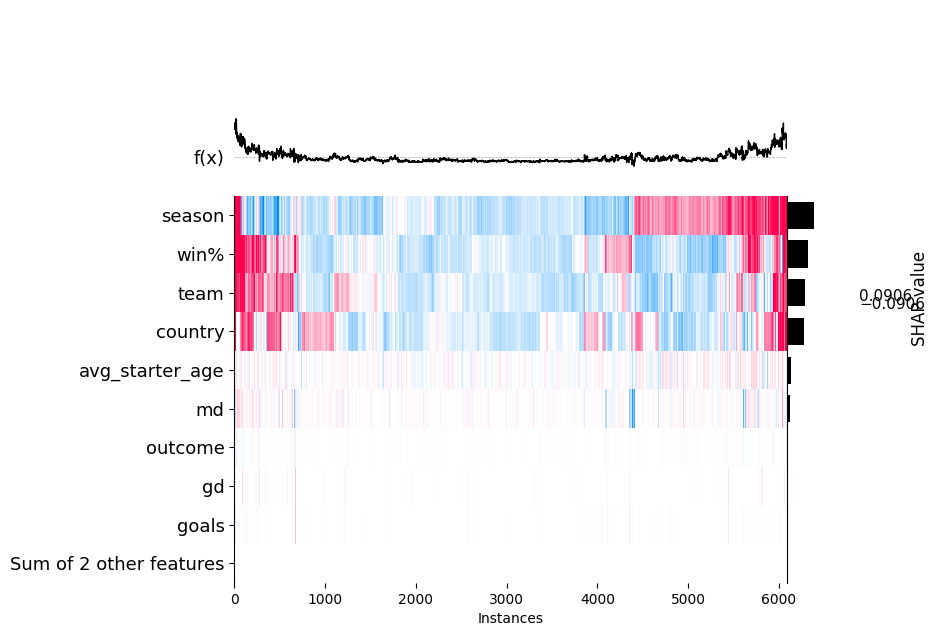

In [ ]:
shap.plots.heatmap(shap_values)